<a href="https://colab.research.google.com/github/adenning-1/QNC-2025/blob/main/Copy_of_Student's_t_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Student%20t.ipynb)

# Definition

The Student's *t* distribution, discovered by a [beer guy](https://en.wikipedia.org/wiki/William_Sealy_Gosset), is one of the most commonly used distributions in basic statistics, for example as part of various forms of [t-tests](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Hypothesis%20Testing/Python/t-Tests.ipynb) used to test hypotheses related to the use of the [mean to describe the central tendency of a set of measurements](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Concepts/Python/Descriptive%20Statistics.ipynb). The usefulness of this distribution arises directly from its [relationship to the Central Limit Theorem](https://ekja.org/journal/view.php?doi=10.4097/kjae.2017.70.2.144), which states that the distribution of the sum (as in the computation of the mean) of a sufficient number of independent samples of a random variable, regardless of its distribution, is [normal](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Gaussian%20(Normal).ipynb).

Specifically, the *t* distribution is very closely related to the standard normal ("Z") distribution, but with the very important difference that it is assumed to be computed using estimates of the parameters of the distribution (i.e., mean and variance) from a sample of observations and not their "true" underlying values.

Let's unpack that:

1\. The standard normal, or Z, distribution, is a [normal distribution](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Gaussian%20(Normal).ipynb) with mean $\mu=0$ and standard deviation $\sigma=1$. It is computed for any normally distributed random variable *X* by subtracting the mean from each value (signal) and dividing by the standard deviation (noise):

$\quad Z=\frac{X-\mu}{\sigma} \sim N(0, 1)$

The historical usefulness of this quantity is reflected in the existence of [z-tables](https://z-table.com) for quickly looking up how a particular z-score relates to the probability of finding values less (or greater) than that z-score (as in standard defintions of p-values used in certain statistical tests).

2\. Consider the case, noted above, where the variable of interest is the mean of a set of observations, called the sample mean. For *n* observations $x={x_1, ..., x_n}$, the sample mean $\bar{x}$ is computed as:

$\quad\bar{x}=\frac{1}{n}\sum\limits_{i=1}^nx_i$

We can assume that this variable is normally distributed if: a) the observations are [themselves normally distributed](https://pmc.ncbi.nlm.nih.gov/articles/PMC3693611/), and/or b) there are a sufficient number of observations to invoke the [Central Limit Theorem](https://online.stat.psu.edu/stat414/book/export/html/750) ($n≥=30$ is often used as a rule of thumb), even if the observations are distributed in other ways (although note that there will be plenty of such cases where the mean is not a particularly good summary of the central tendency of the distribution and so other metrics should be used). In this case, we can compute the Z distribution using a known mean $\mu$ (i.e., the expected value of the sample mean: if you were to do lots and lots of experiments, compute the sample mean for each one, then the mean of those means would be expected to equal $\mu$) and standard deviation (which has a special name when referring to the spread of the distribution of sample means: the standard error of the mean, or *sem*) computed from the known variance ($\sigma^2$) of *X* (i.e., the distribution that the observations came from).

Specifically, the standard error of the mean, given $\sigma$ and $n$, is computed as:

$\quad sem=\frac{\sigma}{\sqrt{n}}$

And thus the *z* distribution from the sample *x* is:

$\quad z=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$

3\. However, it is often the case that you do not know the population variance ($\sigma^2$) (note that for many commonly used tests, this distribution is used as part of the null hypothesis that assumes a particular value of $\mu$, so we are not worried about that parameter here). In this case, an obvious choice is to use the sample variance as a surrogate for the population variance. However, there is a known problem: the sample variance is a biased estimator of the population variance. That is, it is known that the sample variance will differ systematically from the population variance, particuarly when the sample size is low. The intuition is fairly straightfoward, as follows:

The population variance is computed as the average squared deviation from the population mean:

$\quad \sigma^2=\sum{(x_i-\mu)^2/n}$

The sample variance is computed as the average squared deviation from the sample mean:

$\quad s^2=\sum{(x_i-\bar{x})^2/n}$

The problem is that variance measures the average, squared distance from a point, and the sample mean is always the point that minimizes that distance. So if and when $\bar{x}$ differs from $\mu$ (the former is an unbiased estimator of the latter, so *on average* they will be the same, but from sample-to-sample they will differ), the variance computed from $\bar{x}$ will always be smaller than that computed from $\mu$. Consider the extreme case of $n=1$ observations from a normal distribution. Because the normal distribution describes continuous variables, the probability that a single sample will equal the true mean of the distribution exactly is vanishingly small. Accordingly, the variance of even a single observation will be >0. However, for one sample the value of the sample *always* equals the sample mean, and so in that case the sample variance is always 0. This difference is the bias.

It turns out that a simple way to (mostly) correct for this bias is to use the [Bessel-corrected sample variance](https://mathworld.wolfram.com/BesselsCorrection.html) ($s^2$), which divides the sum of squared differences by $n-1$ instead of $n$, to compute the standard error of the mean in the test statistic, now called *t*:

$\quad t=\frac{\bar{X}-\mu}{s/\sqrt{n}}, where\:S=\sqrt{\frac{1}{n-1}\sum^n_{i=1}{(X_i-\bar{X})^2}}$

The (*n*–1) term in *s* is the Bessel correction and governs the **degrees of freedom** (commonly abbrevaited as d.f.) of the *t*-distribution. This term affects how the distribution of *t* relates to the distribution of *z*. Specifically, *t* has "heavy tails" (i.e., a higher probability of extreme values) when *n* is low but then more and more closely approaches a standard normal distribution as *n* increases.

# Getting started with code

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Tutorial

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:207: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


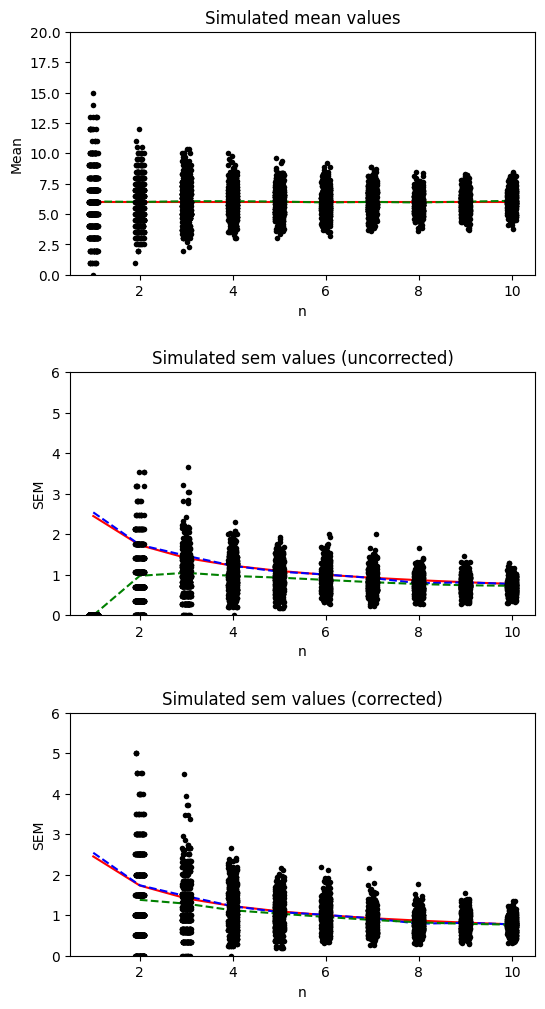

In [2]:
# Use Poisson distribution to simulate measurements of spike rates
poisson_rate = 6

# Simulate num experiments, using sample sizes n=1:num
num_experiments_per_n = 500
max_n_per_experiment = 10
means = np.zeros((max_n_per_experiment, num_experiments_per_n))
stds = np.zeros((max_n_per_experiment, num_experiments_per_n, 2))
# bessel_corrected_stds = np.zeros((max_n_per_experiment, num_experiments_per_n, 2))
ns = np.arange(1,max_n_per_experiment+1)

# Simulate different sample sizes
for n in ns:

    # Simulate multiple experiments
    samples = np.random.poisson(poisson_rate, (num_experiments_per_n, n))

    # Compute the sample mean and std from each experiment
    means[n-1,:] = samples.mean(axis=1)
    stds[n-1,:,0] = samples.std(axis=1,ddof=0)
    stds[n-1,:,1] = samples.std(axis=1,ddof=1)


# Set up figure
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
fig.subplots_adjust(hspace=0.4)

# Top plot is means. Note that the simulated sample means (black dots) provide, on average,
# an unbiased estimate (the mean of the simulated sample means, plotted as a dashed green line)
# of the population mean (red line)
plt.axes(axs[0]).axis([0, max_n_per_experiment, 0, 20])
plt.xlabel('n')
plt.ylabel('Mean')
sns.stripplot(data=means.transpose(),jitter=True,size=4,color='black')
plt.plot([ns[0]-1, ns[-1]-1], [poisson_rate, poisson_rate], 'r-')
plt.plot(ns-1, means.mean(axis=1), 'g--')
plt.title('Simulated mean values')
plt.xticks([1, 3, 5, 7, 9], ['2', '4', '6', '8', '10'])

# Next plots are sems computed without/with Bessel correction.
# Note that the simulated sample sems (black dots) provide, on average,
# a biased estimate (the mean of the simulated sample standard errors,
# plotted as a dashed green line) of the population standard error (red line),
# which is matched by the standard deviation of the simulated means (blue line).
# This bias is highest for small n and is substantially reduced using
# Bessel's correction
#
# Note that computing the corrected sem returns an error for n=1, for which
# the corrected sample sem is not defined (because (n-1) is in the denominator)
title_string = ['uncorrected', 'corrected']
for i in np.arange(2):
    plt.axes(axs[i+1]).axis([0, max_n_per_experiment, 0, 6])
    plt.xlabel('n')
    plt.ylabel('SEM')
    sqrt_ns = np.sqrt(ns)
    sems = stds[:,:,i].transpose()/sqrt_ns[None,:]
    sns.stripplot(data=sems,jitter=True,size=4,color='black')
    plt.plot(ns-1, np.sqrt(poisson_rate/ns), 'r-')
    plt.plot(ns-1, means.std(axis=1), 'b--')
    plt.plot(ns-1,sems.mean(axis=0),'g--')
    plt.title(f'Simulated sem values ({title_string[i]})')
    plt.xticks([1, 3, 5, 7, 9], ['2', '4', '6', '8', '10'])


# Additional Resources

Working with the *t* distribution in [Matlab](https://www.mathworks.com/help/stats/students-t-distribution.html), [R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/TDist.html), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania